In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
gff = pd.read_csv('../../FILES/xl280genome.gff3.csv.gz',index_col=0)

In [3]:
ric8 = pd.read_csv('../../FILES/Chr14/CNN01270.csv',index_col=0)
ssk1 = pd.read_csv('../../FILES/Chr02/CNB03090.csv',index_col=0)
ssk2 = pd.read_csv('../../FILES/Chr12/CNL05560.csv',index_col=0)

In [4]:
ssk2_alt_temp = Seq(''.join(ssk2[(ssk2.Seq==1)].Alt.values)).translate(to_stop=True)

In [5]:
len('MSNPTSPTDPPDAGPPPPAIASSSKTGRRSVRLFAPDEEDSSDEDGLIGVPAETTFNDDEVPPSNTRSASYPGPPAHTSPTSKISSIVSSASAAQPKLARSITYVAPSAISSRPAYPLHPAGPETLHASYETWRKTRYTLESFSRAKADGKNAAQRGRSYTDPDVGYFSPDAGDDGWGSDDEDELRSPGWGISHHNMDSGGKTDGSPQLPIKPADVTEDEGQERLDWQG')

229

In [6]:
print(ssk2_alt_temp)

MSNPTSPTDPPDAGPPPPAIASSSKTGRRSVRLFAPDEEDSSDEDGLIGVPAETTFNDDEVPPSNTRSASYPGPPAHTSPTSKISSIVSSASAAQPKLARSITYVAPSAISSRPAYPLHPAGPETLHASYETWRKTRYTLESFSRAKADGKNAAQRGRSYTDPDVGYFSPDAGDDGWGSDDEDELRSPGWGISHHNMDSGGKTDGSPQLPIKPADVTEDEGQERLDWQGMLESVLNSDVLKVEEQRIYNSMPTDSFREEIGKTLWWQIRAKLRGRTEAEEKKRVQERRARVVDPVLEEINEFKYDPKNNPEGEEDSDADPQDATSTAAPQSKALNQVNTILAKLHAVKGLYPNLAAMRADKSLYTDENFRKRADALTSWSIIVSSLQTQLKLLQKWTGSDELDITKPNTTHEKALVGKYKYHHSIDSKGTPGRDAADDSSFLDRVIKEDNLQRTFERRAFVDMINLVRNAKETVINYLPQFQEQNLPDFQYEIVRLIGFPGRLIIEAVKVRLDAASRLLDPNPMVVEDFIENLRLSISLAVLIRKQYDEIMAPDAEGRWKIPHCLPTEYNDVLLDALRTFFKLLHWRLRGVGKASYYKETEVLEEEAPFLYEAAEAIVGGDMVVAEQYCALSNKLLIRSANYLDQQLRVPIHSHSRDKERGGDKERDGSSSSQRDRNRDGSLAGPPKHMKVEELFSWYSKLLDSARMRHRKTQRFCRKLTQRFDNSAEYSIEETDVDMLVETLQDTGHFLVYTGKFEANGTYIVADGSLWGQPDDVRHLLKRVFSVTIPGSRVRPRQTTSQVSGGGGVLANGQVAAAQPDPADPYPEADDFDDEALAAYILLISPRQNFVWSGAVMTLDVDYIDYELADNRVRLIADGPTKRLALCKHYFTQALIHPDTGETIDLPCVVEAQAHLPTIQKQLVKIAKSSYRLSECIVQSAPLVRNAFRGKPGSQELVENWYSFATEHGTRVLVHIEPSAWDRFNRLLMRLAISWISFISQ

In [7]:
ssk1_ref = Seq(''.join(ssk1[(ssk1.Seq==1)].Ref.values)).reverse_complement()
len(ssk1_ref.translate(to_stop=True))

1337

In [8]:
ssk1_alt = Seq(''.join(ssk1[(ssk1.Seq==1)].Alt.values)).reverse_complement()
len(ssk1_alt.translate(to_stop=True))

/Users/croth/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


157

In [9]:
ric8['Start'].min(),ric8['End'].max()

(386833, 389698)

In [10]:
ric8_xl280 = ''.join(ric8.Ref.tolist())
ric8_431 = ''.join(ric8.Alt.tolist())

In [11]:
#open('/Users/croth/Desktop/ric8.fasta','w').writelines('>XL280\n'+ric8_xl280 + '\n>431\n'+ ric8_431)

In [12]:
len(ric8_xl280)

2866

In [13]:
len(ric8_431)

2863

In [14]:
ric8_ref = Seq(''.join(ric8[(ric8.Seq==1)].Ref.tolist()))
ric8_alt = Seq(''.join(ric8[(ric8.Seq==1)].Alt.tolist()))

In [15]:
ric8['Pos1'] = ric8['Start'] - ric8.Start.min()
ric8['Pos2'] = ric8['End'] - ric8.Start.min()

In [16]:
ric8.head()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
0,386833,386833,C,C,0.0,1,5,CNN01270,0,0
1,386834,386834,A,A,0.0,1,5,CNN01270,1,1
2,386835,386835,A,A,0.0,1,5,CNN01270,2,2
3,386836,386836,G,G,0.0,1,5,CNN01270,3,3
4,386837,386837,T,T,0.0,1,5,CNN01270,4,4


In [17]:
ric8[(ric8.Seq==1)].tail()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
2706,389546,389546,G,G,0.0,1,1,CNN01270,2713,2713
2707,389547,389547,G,G,0.0,1,1,CNN01270,2714,2714
2708,389548,389549,T,C,1.0,1,1,CNN01270,2715,2716
2709,389549,389549,A,A,0.0,1,1,CNN01270,2716,2716
2710,389550,389550,G,G,0.0,1,1,CNN01270,2717,2717


In [18]:
ric8[(ric8.Seq==3)].shape

(148, 10)

In [19]:
ric8_alt = Seq(''.join(ric8[(ric8.Seq==1) | (ric8.Seq==3)].Alt.tolist()))

In [20]:
len(ric8_alt.translate(to_stop=True))

/Users/croth/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


691

In [21]:
len(ric8_ref)/3

692.0

In [22]:
ssk1.head()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene
0,930962,930962,C,C,0.0,-1,3,CNB03090
1,930963,930963,T,T,0.0,-1,3,CNB03090
2,930964,930964,T,T,0.0,-1,3,CNB03090
3,930965,930965,G,G,0.0,-1,3,CNB03090
4,930966,930966,G,G,0.0,-1,3,CNB03090


In [23]:
ref_rc = [str(Seq(a).reverse_complement()) for a in ssk1.Ref.tolist()]
alt_rc = [str(Seq(a).reverse_complement()) for a in ssk1.Alt.tolist()]

In [24]:
ssk1['Refrc'] = ref_rc
ssk1['Altrc'] = alt_rc

In [25]:
ssk1['Lenr'] = [len(a) for a in ssk1.Ref]
ssk1['Lena'] = [len(a) for a in ssk1.Alt]

In [26]:
ssk1_rc = ssk1[::-1].copy()

In [27]:
ssk1_rc['Pos1'] = np.abs(ssk1_rc.Start - ssk1_rc.End.max())
ssk1_rc['Pos2'] = np.abs(ssk1_rc.End - ssk1_rc.End.max())

In [28]:
len(Seq(''.join(ssk1_rc[(ssk1_rc.Seq==1)].Refrc.tolist())).translate(to_stop=True))

1337

In [29]:
len(Seq(''.join(ssk1_rc[(ssk1_rc.Seq==1)].Altrc.tolist())).translate(to_stop=True))

/Users/croth/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


157

In [30]:
ssk1_rc['PosL'] = ssk1_rc.Lenr.cumsum() - 1

In [31]:
ssk1_rc[(ssk1_rc.Seq==1) & (ssk1_rc.Var!=0) & (ssk1_rc.Lenr>1)]

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Refrc,Altrc,Lenr,Lena,Pos1,Pos2,PosL
4315,935288,935293,GGGGT,CGGGT,1.0,-1,1,CNB03090,ACCCC,ACCCG,5,5,155,150,155
3931,934901,934905,CAGT,GAGG,1.0,-1,1,CNB03090,ACTG,CCTC,4,4,542,538,542
3925,934889,934896,GAATTCC,GAATTTCC,1.0,-1,1,CNB03090,GGAATTC,GGAAATTC,7,8,554,547,554
2360,933322,933325,TTC,TTA,1.0,-1,1,CNB03090,GAA,TAA,3,3,2121,2118,2121


In [32]:
ssk1_rc.PosL.max()

4481

In [33]:
# 537 for the snps and 546 for the insertion

In [34]:
#ssk1_rc[(ssk1_rc.Pos1>=546)&(ssk1_rc.Seq==1)& 
#                               (ssk1_rc.Pos1<595)].head()

In [35]:
#toplotXL = Seq(''.join(ssk1_rc[(ssk1_rc.Pos1>=546)&(ssk1_rc.Seq==1)& 
#                               (ssk1_rc.Pos1<595)].Refrc.tolist())).translate()
#toplotXL

In [36]:
#toplot431 = Seq(''.join(ssk1_rc[(ssk1_rc.Pos1>=546)&
#                    (ssk1_rc.Seq==1)&(ssk1_rc.Pos1<595)].Refrc.tolist())).translate()

In [37]:
alttoplot = ''.join(ssk1_rc[(ssk1_rc.Pos1>=546) & (ssk1_rc.Seq==1) & 
                            (ssk1_rc.Pos1<593)].Altrc.tolist())
toplot431 = Seq(alttoplot).translate()
toplot431

Seq('MEIHYCRTACTGLRL*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [38]:
alttoplot

'ATGGAAATTCACTACTGCCGGACCGCCTGTACAGGGCTACGACTTTGA'

In [39]:
reftoplottemp = ''.join(ssk1_rc[(ssk1_rc.Pos1>=546) & (ssk1_rc.Seq==1)& 
                                (ssk1_rc.Pos1<593)].Refrc.tolist())
toplotXL = Seq(reftoplottemp).translate()
toplotXL

/Users/croth/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Seq('MEFTTAGPPVQGYDF', ExtendedIUPACProtein())

In [40]:
cutseq=6
reftoplot = reftoplottemp[:cutseq] + ' ' + reftoplottemp[cutseq:]
print(reftoplot[:10])
print(alttoplot[:10])

ATGGAA TTC
ATGGAAATTC


In [41]:
path = './AA_color_df.csv'

import random

number_of_colors = 17

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)
for i in range(number_of_colors):
    plt.scatter(random.randint(0, 10), random.randint(0,10), c=color[i], s=200)
color_df = pd.DataFrame([np.unique([a for a in str(toplotXL)] + [a for a in str(toplot431)] + ['S']),['r']+color]).T
color_df.columns = ['AA','Color']
color_df.to_csv(path)

In [42]:
color_df = pd.read_csv(path,index_col=0)

In [43]:
color_df

,AA,Color
0,*,r
1,A,#56D3C2
2,C,#A8D142
3,D,#2ABC02
4,E,#6C0A26
5,F,#CB5CBF
6,G,#691FDF
7,H,#7AF8C8
8,I,#2E01B7
9,L,#ED9579


In [44]:
from matplotlib import rc

######## --------- SSK1 ---------------- #########
fig,ax = plt.subplots(2,1,figsize=(12,6),sharey=False,sharex=True)
plt.sca(ax[0])

plt.hlines(0,0,ssk1_rc.PosL.max(),color='grey',linewidth=5)
plt.vlines(ssk1_rc[(ssk1_rc.Seq==1)].Pos1.values,
          -0.04,0.04,color='grey');
plt.vlines(ssk1_rc[(ssk1_rc.Var!=0) & (ssk1_rc.Seq==1)].Pos1.values,
           -0.039,0.04,color='k',linewidth=0.5)
plt.vlines(ssk1_rc[(ssk1_rc.Var!=0) & (ssk1_rc.Seq!=1)].Pos1.values,
           -0.0099,0.01,color='k',linewidth=0.5)

plt.ylim(-0.1,0.5)

L = 0
for i in np.arange(0,len(alttoplot),1):
    if reftoplot[i] != alttoplot[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=L+(70*i),y=0.32,s=alttoplot[i],ha='center',va='center',fontsize=14)
    plt.text(x=L+(70*i),y=0.2,s=reftoplot[i],ha='center',va='center',fontsize=14)
    plt.text(x=L+(70*i),y=0.27,s=s,ha='center',va='center',fontsize=10)

plt.plot([552,L+(71*i)],[0.04,0.15],'k',linestyle='--',alpha=0.5)
plt.plot([552,L],[0.04,0.15],'k',linestyle='--',alpha=0.5)
plt.text(-70,0.32,'431'+'\u03B1:',fontsize=14,va='center',ha='right')
plt.text(-70,0.2,'XL280'+r'$\bf{a}$'+':',fontsize=14,va='center',ha='right');

sep = 0
for i, a in enumerate(toplot431):
    plt.hlines(0.41,-35+sep,(70*2.5)+sep,
               linewidth=20,color= color_df[(color_df.AA==a)].Color );
    
    if a == "*":
        sa = 'STOP'
        fs = 10
    else:
        sa = a
        fs = 14
    plt.text(((70*2.5)+sep)-105, 0.41,s=sa, color='w',
             fontweight='bold',va='center',fontsize=fs,ha='center');
    sep = sep + 70*3


plt.axis('off')
startssk1 = ssk1_rc[(ssk1_rc.Seq==1)].Pos1.min()+1
stopssk1 = ssk1_rc[(ssk1_rc.Seq==1)].PosL.max()
plt.text(startssk1,-0.045,'%s\nATG'%(startssk1),fontsize=14,ha='center',va='top')
plt.text(stopssk1,-0.045,'%s\nTGA'%(stopssk1),fontsize=14,ha='center',va='top')
plt.text(553,-0.045,'552',fontsize=14,ha='center',va='top')
plt.text(s='SSK1',x=-400,y=0,fontsize=16,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');

######## --------- RIC8 ---------------- #########
plt.sca(ax[1])
plt.hlines(0,ric8.Pos1.min(),ric8.Pos2.max(),color='grey',linewidth=5)

plt.vlines(ric8[(ric8.Seq==1)].Pos1.values,
          -0.04,0.04,color='grey');

plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq==1)].Pos1.values,
           -0.039,0.04,color='k',linewidth=0.5)

plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq!=1)].Pos1.values,
           -0.0099,0.01,color='k',linewidth=0.5)

plt.text(324,0.045,'ATG\n324',fontsize=14,ha='center',va='bottom')
plt.text(2716,0.045,'TAG\n2716',fontsize=14,ha='center',va='bottom')
plt.text(1957,0.045,'1958',fontsize=14,ha='center',va='bottom')

plt.text(500,-0.1,'1 kb',fontsize=14,va='top',ha='center')
plt.hlines(-0.09,0,1000)
plt.axis('off');

e6s = 1944
e6e = 1960
it6s = 1889
it6e = 1945

tempx1 = ric8_431[e6s-3:e6e-3]
tempx2 = ric8_xl280[e6s:e6e]

for i in np.arange(1,len(tempx2),1):
    if tempx1[i] != tempx2[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=1300+(70*i),y=-0.2,s=tempx1[i],ha='center',va='center',fontsize=14)
    plt.text(x=1300+(70*i),y=-0.31,s=tempx2[i],ha='center',va='center',fontsize=14)
    plt.text(x=1300+(70*i),y=-0.25,s=s,ha='center',va='center',fontsize=10)

aa = Seq(tempx2[1:]).translate()
sep = 0
for i, a in enumerate(aa):
    plt.hlines(-0.4,1340+sep,(1345+(70*3))+sep,linewidth=20,color=color_df[(color_df.AA==a)].Color)
    sep = sep + (70*3)

for i in range(len(aa)):
    if aa[i] == "*":
        sa = 'STOP'
        fs = 10
    else:
        sa = aa[i]
        fs = 14
    plt.text(1450+(210*i),y=-0.40,s=sa,color='w',
             fontweight='bold',va='center',fontsize=fs,ha='center');

plt.plot([1370,1945],[-.15,-0.04],'k',linestyle='--',alpha=0.5)
plt.plot([1300+(70*(len(tempx2)-1)),1960],[-.15,-0.04],
         'k',linestyle='--',alpha=0.5)

plt.text(1300,-0.2,'431'+'\u03B1:',fontsize=14,va='center',ha='right')
plt.text(1300,-0.31,'XL280'+r'$\bf{a}$'+':',fontsize=14,va='center',ha='right');
plt.ylim(-0.5,0.1)
plt.subplots_adjust(hspace=0.5)
plt.xlim(-100,ssk1_rc.Pos1.max());

plt.text(s='RIC8',x=-400,y=0,fontsize=16,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');
plt.savefig('../../FIGURES/RIC8_SSK1_gene_body.png',
                  dpi=300,bbox_inches='tight');

fig,ax = plt.subplots(1,1,figsize=(10,3),sharex=True)

plt.hlines(0,ric8.Pos1.min(),ric8.Pos2.max(),color='grey',linewidth=5)

plt.vlines(ric8[(ric8.Seq==1)].Pos1.values,
          -0.04,0.04,color='grey');

plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq==1)].Pos1.values,
           -0.039,0.04,color='k',linewidth=0.5)

plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq!=1)].Pos1.values,
           -0.0099,0.01,color='k',linewidth=0.5)

plt.yticks([0],labels=' ');
plt.xticks(fontsize=16);
plt.text(324,0.045,'ATG\n324',fontsize=14,ha='center',va='bottom')
plt.text(2716,0.045,'TAG\n2716',fontsize=14,ha='center',va='bottom')
plt.text(1957,0.045,'1958',fontsize=14,ha='center',va='bottom')
plt.xlim(0,np.max(ric8.Pos2));

plt.text(500,-0.07,'1 kb',fontsize=14,va='top',ha='center')
plt.hlines(-0.06,0,1000)
plt.axis('off');

e6s = 1944
e6e = 1960
it6s = 1889
it6e = 1945


tempx1 = ric8_431[e6s-3:e6e-3]
tempx2 = ric8_xl280[e6s:e6e]

for i in np.arange(1,len(tempx2),1):
    if tempx1[i] != tempx2[i]:
        color='r'
        s = ' '
    else:
        color='k'
        s = '|'
    plt.text(x=1300+(70*i),y=-0.2,s=tempx1[i],ha='center',va='center',fontsize=14)
    plt.text(x=1300+(70*i),y=-0.31,s=tempx2[i],ha='center',va='center',fontsize=14)
    plt.text(x=1300+(70*i),y=-0.25,s=s,ha='center',va='center',fontsize=10)



aa = Seq(tempx2[1:]).translate()
#plt.hlines(-0.4,1340,1550,linewidth=20,color='pink');
#plt.hlines(-0.4,1555,1755,linewidth=20,color='b');
#plt.hlines(-0.4,1760,1970,linewidth=20,color='olive');
#plt.hlines(-0.4,1975,2175,linewidth=20,color='olive');
#plt.hlines(-0.4,2180,2400,linewidth=20,color='r');

for i in range(len(aa)):
    plt.text(1450+(210*i),y=-0.395,s=aa[i],color='w',
             fontweight='bold',va='center',fontsize=14,ha='center');

plt.plot([1370,1945],[-.15,-0.04],'k',linestyle='--',alpha=0.5)
plt.plot([1300+(70*(len(tempx2)-1)),1960],[-.15,-0.04],
         'k',linestyle='--',alpha=0.5)


plt.text(1150,-0.2,'431'+'\u03B1:',fontsize=14,va='center',ha='center')
plt.text(1150,-0.31,'XL280:',fontsize=14,va='center',ha='center')


ricend = 'TAGTAA'
end431 = ric8_alt[-151:-145]
for i in np.arange(len(end431)):
    if ricend[i] != end431[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=2700+(70*i),y=-0.2,s=end431[i],ha='center',va='center',fontsize=14)
    plt.text(x=2700+(70*i),y=-0.31,s=ricend[i],ha='center',va='center',fontsize=14)
    plt.text(x=2700+(70*i),y=-0.25,s=s,ha='center',va='center',fontsize=10)
plt.xlim(0,3100)

plt.plot([2700,2715],[-.15,-0.04],'k',linestyle='--',alpha=0.5)
plt.plot([2700+(70*(len(ricend)-1)),2721],[-.15,-0.04],
         'k',linestyle='--',alpha=0.5)
#plt.hlines(-0.11,2880,3090,linewidth=15,color='r');

xl_del = ric8_xl280[1047:1053+3]
del431 = ric8_431[1047:1050] + 'XXX' + ric8_431[1050:1053]
for i in np.arange(len(xl_del)):
    if del431[i] == 'X':
        ss = ' '
    else:
        ss = del431[i]
    if xl_del[i] != ss:
        s = ' '
    else:
        s = '|'

    plt.text(x=800+(70*i),y=0.31,s=ss,ha='center',va='center',fontsize=14)
    plt.text(x=800+(70*i),y=0.2,s=xl_del[i],ha='center',va='center',fontsize=14)
    plt.text(x=800+(70*i),y=0.26,s=s,ha='center',va='center',fontsize=10)
plt.text(600,.31,'431'+'\u03B1:',fontsize=14,va='center',ha='center')
plt.text(600,.2,'XL280:',fontsize=14,va='center',ha='center')
plt.plot([800,1048],[.15,0.04],'k',linestyle='--',alpha=0.5)
plt.plot([800+(70*(len(xl_del)-1)),1052],[.15,0.04],
         'k',linestyle='--',alpha=0.5)
plt.text(1050,0.045,'1051',fontsize=14,ha='center',va='bottom')
plt.ylim(-0.4,0.4)
   
plt.savefig('../../FIGURES/RIC8_gene_body_major_vars.png',
                  dpi=300,bbox_inches='tight');

In [45]:
ric8.head()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
0,386833,386833,C,C,0.0,1,5,CNN01270,0,0
1,386834,386834,A,A,0.0,1,5,CNN01270,1,1
2,386835,386835,A,A,0.0,1,5,CNN01270,2,2
3,386836,386836,G,G,0.0,1,5,CNN01270,3,3
4,386837,386837,T,T,0.0,1,5,CNN01270,4,4


In [46]:
ssk2['Pos1'] = ssk2['Start'] - ssk2.Start.min()
ssk2['Pos2'] = ssk2['End'] - ssk2.Start.min()

In [47]:
reftoplot = '-'.join(reftoplot.split('*'))

16 A P
239 F L
737 V M


/Users/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:231: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:231: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:231: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


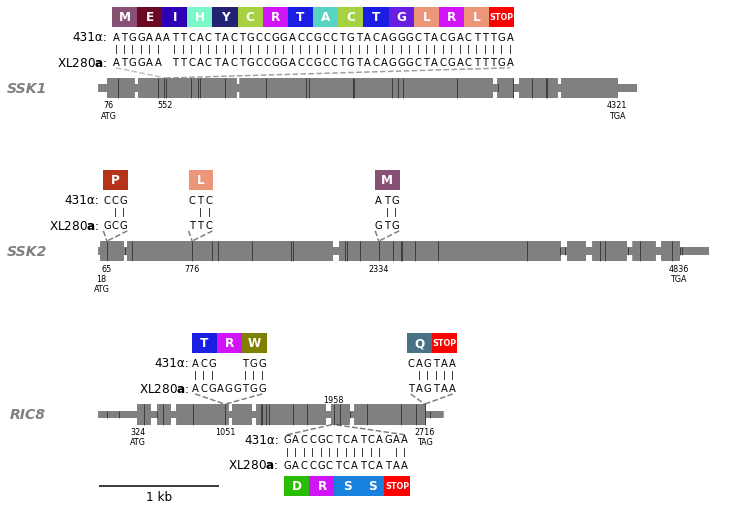

In [51]:
######## --------- SSK1 ---------------- #########
fig,ax = plt.subplots(3,1,figsize=(12,9),sharey=True,sharex=True,facecolor='w')
plt.sca(ax[0])
fs = 10
name_place = -600
intron_width = 0.75
exon_width = 2
var_linewidth = 0.5
plt.vlines(ssk1_rc[(ssk1_rc.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='grey')

plt.vlines(ssk1_rc[(ssk1_rc.Seq==1)].Pos1.values,
          -exon_width,exon_width,color='grey');

plt.vlines(ssk1_rc[(ssk1_rc.Var!=0) & (ssk1_rc.Seq==1)].Pos1.values,
           -exon_width,exon_width,color='k',linewidth=var_linewidth)

plt.vlines(ssk1_rc[(ssk1_rc.Var!=0) & (ssk1_rc.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='k',linewidth=var_linewidth)


L = 140
ts = 70
for i in np.arange(0,len(alttoplot),1):
    if reftoplot[i] != alttoplot[i]:
        s = ' '
    else:
        s = '|'
    #if reftoplot[i] == '*':
    #    fss = 16
    #else:
    #    fss = fs
    plt.text(x=L+(ts*i),y=10,s=alttoplot[i],ha='center',va='center',fontsize=fs)
    plt.text(x=L+(ts*i),y=5,s=reftoplot[i],ha='center',va='center',fontsize=fs)
    plt.text(x=L+(ts*i),y=7.7,s=s,ha='center',va='center',fontsize=fs-1)

## Add dashed lines for sequence
plt.plot([L,552],[4,2],alpha=0.5,linestyle='--',color='grey');
plt.plot([552,L+(ts*i)],[2,4],alpha=0.75,linestyle='--',color='grey');

## Add strain names to left of ssk1 sequence
plt.text(L-70,10,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(L-70,5,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right');

sep = 0
for i, a in enumerate(toplot431):
    plt.hlines(14,L-35+sep,L+(ts*2.5)+sep,
               linewidth=20,color= color_df[(color_df.AA==a)].Color );
    
    if a == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = a
        fss = fs+2
    plt.text(((ts*2.5)+sep+L)-105,14,s=sa, color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');
    sep = sep + ts*3
    
startssk1 = ssk1_rc[(ssk1_rc.Seq==1)].Pos1.min()+1
stopssk1 = ssk1_rc[(ssk1_rc.Seq==1)].Pos1.tolist()[-3]+1
plt.text(startssk1,-(exon_width+0.5),'%s\nATG'%(startssk1),fontsize=fs-2,ha='center',va='top')
plt.text(stopssk1,-(exon_width+0.5),'%s\nTGA'%(stopssk1),fontsize=fs-2,ha='center',va='top')
plt.text(553,-(exon_width+0.5),'552',fontsize=fs-2,ha='center',va='top')
plt.text(s='SSK1',x=name_place,y=0,fontsize=fs+4,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');
plt.axis('off');


######## ------------ RIC8 ---------------- #########
## Plot the gene body and variants
fs =10
plt.sca(ax[2])
plt.vlines(ric8[(ric8.Seq==1)].Pos1.values,
           -exon_width,exon_width,color='grey');
plt.vlines(ric8[(ric8.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='grey');
plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq==1)].Pos1.values,
           -exon_width,exon_width,color='k',linewidth=0.5)
plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='k',linewidth=0.5)



plt.text(324,-(exon_width+0.5),'324\nATG',fontsize=fs-2,ha='center',va='top')
plt.text(2716,-(exon_width+0.5),'2716\nTAG',fontsize=fs-2,ha='center',va='top')
plt.text(1957,exon_width,'1958',fontsize=fs-2,ha='center',va='bottom')

plt.text(500,-15,'1 kb',fontsize=fs+2,va='top',ha='center')
plt.hlines(-14,0,1000,color='k')
#plt.axis('off');

e6s = 1944
e6e = 1960
it6s = 1889
it6e = 1945

tempx1 = ric8_431[e6s-3:e6e-3]
tempx2 = ric8_xl280[e6s:e6e]

for i in np.arange(1,len(tempx2),1):
    if tempx1[i] != tempx2[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=1500+(70*i),y=-5,s=tempx1[i],ha='center',va='center',fontsize=fs)
    plt.text(x=1500+(70*i),y=-10,s=tempx2[i],ha='center',va='center',fontsize=fs)
    plt.text(x=1500+(70*i),y=-7.4,s=s,ha='center',va='center',fontsize=fs-1)

aa = Seq(tempx2[1:]).translate()
sep = 0
for i, a in enumerate(aa):
    plt.hlines(-14,1540+sep,(1545+(70*3))+sep,linewidth=20,color=color_df[(color_df.AA==a)].Color)
    sep = sep + (70*3)

for i in range(len(aa)):
    if aa[i] == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = aa[i]
        fss = fs+2
    plt.text(1650+(210*i),y=-14,s=sa,color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');

plt.plot([1570,1945],[-4,-2],'k',linestyle='--',alpha=0.5)
plt.plot([1500+(70*(len(tempx2)-1)),1960],[-4,-2],
         'k',linestyle='--',alpha=0.5)

plt.text(1500,-5,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(1500,-10,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right');

plt.text(s='RIC8',x=name_place,y=0,fontsize=fs+4,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');

## The deletion in RIC8
xl_del = ric8_xl280[1047:1053+3]
del431 = ric8_431[1047:1050] + 'XXX' + ric8_431[1050:1053]
for i in np.arange(len(xl_del)):
    if del431[i] == 'X':
        ss = ' '
    else:
        ss = del431[i]
    if xl_del[i] != ss:
        s = ' '
    else:
        s = '|'

    plt.text(x=800+(70*i),y=10,s=ss,ha='center',va='center',fontsize=fs)
    plt.text(x=800+(70*i),y=5,s=xl_del[i],ha='center',va='center',fontsize=fs)
    plt.text(x=800+(70*i),y=7.7,s=s,ha='center',va='center',fontsize=fs-1)
plt.plot([800,1050],[4,2],'k',linestyle='--',alpha=0.5)
plt.plot([800+(70*i),1050],[4,2],
         'k',linestyle='--',alpha=0.5)
plt.text(1050,-(exon_width+0.5),'1051',fontsize=fs-2,ha='center',va='top')

a = Seq('ACG').translate()[0]
plt.hlines(14,770,(770+(70*3)), linewidth=20, color=color_df[(color_df.AA==a)].Color)
plt.text(770+(70*1.5),y=14,s=a,color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');
a = Seq('AGG').translate()[0]
plt.hlines(14,770+(70*3),(770+(70*6)), linewidth=20, color=color_df[(color_df.AA==a)].Color)
plt.text(770+(70*4.5),y=14,s=a,color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');
a = Seq('TGG').translate()[0]
plt.hlines(14,770+(70*6),(770+(70*9)), linewidth=20, color='olive')
plt.text(770+(70*7.5),y=14,s=a,color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');

plt.text(750,10,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(750,5,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right');



ricend = 'TAGTAA'
end431 = ric8_alt[-151:-145]
for i in np.arange(len(end431)):
    if ricend[i] != end431[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=2600+(70*i),y=10,s=end431[i],ha='center',va='center',fontsize=fs)
    plt.text(x=2600+(70*i),y=5,s=ricend[i],ha='center',va='center',fontsize=fs)
    plt.text(x=2600+(70*i),y=7.7,s=s,ha='center',va='center',fontsize=fs-1)
plt.plot([2600,2715],[4,2],'k',linestyle='--',alpha=0.5)
plt.plot([2600+(70*i),2715],[4,2],
         'k',linestyle='--',alpha=0.5)  
a = Seq('CAG').translate()[0]
plt.hlines(14,2600-30+(70*0),((2600-30)+(70*3)), 
           linewidth=20, color=color_df[(color_df.AA==a)].Color)
plt.text(2600-30+(70*1.5),y=14,s=a,color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');
a = 'STOP'
plt.hlines(14,2600-30+(70*3),((2600-30)+(70*6)), linewidth=20, color='r')
plt.text(2600-30+(70*4.5),y=14,s=a,color='w',
     fontweight='bold',va='center',fontsize=fs-2,ha='center');

plt.ylim(-16,16);
plt.axis('off');



######## ------------ SSK2 ---------------- #########
plt.sca(ax[1])
ssk2_alt = Seq(''.join(ssk2[(ssk2.Seq==1)].Alt.tolist())).translate(to_stop=True)
ssk2_ref = Seq(''.join(ssk2[(ssk2.Seq==1)].Ref.tolist())).translate(to_stop=True)
coding_difs = []
for i,k in enumerate(ssk2_ref):
    if k != ssk2_alt[i]:
        print(i,k,ssk2_alt[i])
        coding_difs.append((i,k,ssk2_alt[i]))
        
        
ssk2_ref_seq = Seq(''.join(ssk2[(ssk2.Seq==1)].Ref.tolist()))
ssk2_alt_seq = Seq(''.join(ssk2[(ssk2.Seq==1)].Alt.tolist()))
refcodons = [ssk2_ref_seq[(c[0]*3):((c[0]+1)*3)] for c in coding_difs]
altcodons = [ssk2_alt_seq[(c[0]*3):((c[0]+1)*3)] for c in coding_difs]


plt.vlines(ssk2[(ssk2.Seq==1)].Pos1,-exon_width,exon_width,color='grey');
plt.vlines(ssk2[(ssk2.Seq!=1)].Pos1,-intron_width,intron_width,color='grey');
plt.vlines(ssk2[(ssk2.Var==1) & (ssk2.Seq==1)].Pos1.values,
           -exon_width,exon_width,linewidth=0.5,color='k')
plt.vlines(ssk2[(ssk2.Var==1) & (ssk2.Seq!=1)].Pos1.values,
           -intron_width,intron_width,linewidth=0.5,color='k')

upd = [(10,5,7.7),(10,5,7.7),(10,5,7.7)]
for j,c in enumerate(coding_difs):
    nspos = ssk2[(ssk2.Seq==1)].iloc[:(c[0])*3][(ssk2.Var==1)].Pos1.tolist()[-1]
    for i,r in enumerate(refcodons[j]):
        a = altcodons[j][i]
        if r != a:
            s = ' '
        else:
            s = '|'
        plt.text(x= nspos+(70*i),y= upd[j][0], s=a,ha='center',va='center',fontsize=fs)
        plt.text(x=nspos+(70*i),y= upd[j][1], s=r,ha='center',va='center',fontsize=fs)
        plt.text(x=nspos+(70*i),y= upd[j][-1], s=s,ha='center',va='center',fontsize=fs-1)
    plt.plot([nspos-30,nspos],[upd[j][1]-1,2],'k',linestyle='--',alpha=0.5)
    plt.plot([nspos+(85*i),nspos],[upd[j][1]-1,2],'k',linestyle='--',alpha=0.5)
    aa = c[-1]
    plt.hlines(14,nspos-30,(nspos+(70*2.5)), 
               linewidth=20, color=color_df[(color_df.AA==aa)].Color)
    plt.text(nspos+70,y=14,s=aa,color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');
    plt.text(nspos,y=-(exon_width+0.5),s=str(nspos+1),fontsize=fs-2,ha='center',va='top')
    #print(aa)
## Add strain names to left of ssk1 sequence
plt.text(0,10,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(0,5,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right')
    
plt.axis('off')
plt.text(s='SSK2',x=name_place,y=0,fontsize=fs+4,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');

plt.text(x=ssk2[(ssk2.Seq==1)].Pos1.tolist()[-3],
         y=-(exon_width+0.5),s='%s\n%s'%(ssk2[(ssk2.Seq==1)].Pos1.tolist()[-3]+1,
            ''.join(ssk2[(ssk2.Seq==1)].Ref.tolist()[-3:])),
         va='top',ha='center',fontsize=fs-2);

plt.text(x=ssk2[(ssk2.Seq==1)].Pos1.min()+1,
         y=-(exon_width+2.5),s='%s\n%s'%(ssk2[(ssk2.Seq==1)].Pos1.min()+1,
            ''.join(ssk2[(ssk2.Seq==1)].Ref.tolist()[:3])),
         va='top',ha='center',fontsize=fs-2);
plt.subplots_adjust(wspace=0.0,hspace=0.0)
#plt.savefig('../../FIGURES/Cdx_SSK1_SSK2_RIC8_all.png',
plt.savefig('/Users/croth/QTL_FIGS/SUPP/FIGS/S14_Fig.pdf',
            dpi=300,bbox_inches='tight');

/Users/croth/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


17 A P
240 F L
738 V M


/Users/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:204: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:204: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


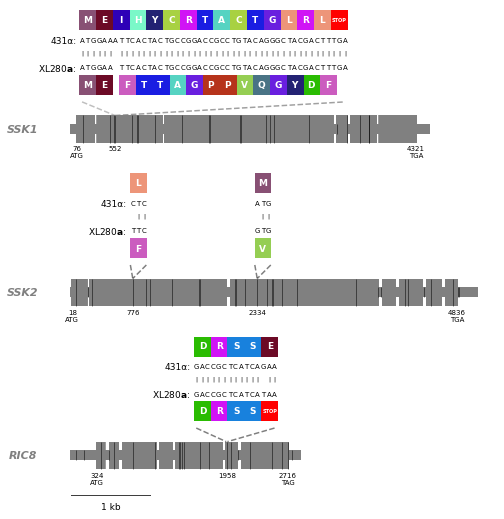

In [89]:
######## --------- SSK1 ---------------- #########
fig,ax = plt.subplots(3,1,figsize=(8,9),sharey=True,sharex=True,facecolor='w')
plt.sca(ax[0])
fs = 7
name_place = -600
intron_width = 0.75
exon_width = 2
var_linewidth = 0.5
plt.vlines(ssk1_rc[(ssk1_rc.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='grey')

plt.vlines(ssk1_rc[(ssk1_rc.Seq==1)].Pos1.values,
          -exon_width,exon_width,color='grey');

plt.vlines(ssk1_rc[(ssk1_rc.Var!=0) & (ssk1_rc.Seq==1)].Pos1.values,
           -exon_width,exon_width,color='k',linewidth=var_linewidth)

plt.vlines(ssk1_rc[(ssk1_rc.Var!=0) & (ssk1_rc.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='k',linewidth=var_linewidth)


L = 140
ts = 70
for i in np.arange(0,len(alttoplot),1):
    if reftoplot[i] != alttoplot[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=L+(ts*i),y=13,s=alttoplot[i],ha='center',va='center',fontsize=fs)
    plt.text(x=L+(ts*i),y=9,s=reftoplot[i],ha='center',va='center',fontsize=fs)
    plt.text(x=L+(ts*i),y=11.25,s=s,ha='center',va='center',fontsize=fs-1)

## Add dashed lines for sequence
plt.plot([L,552],[4,2],alpha=0.5,linestyle='--',color='grey');
plt.plot([552,L+(ts*i)],[2,4],alpha=0.75,linestyle='--',color='grey');

## Add strain names to left of ssk1 sequence
plt.text(L-70,13,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(L-70,9,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right');

sep = 0
for i, a in enumerate(toplot431):
    plt.hlines(16,L-35+sep, L+(ts*2.5)+sep,
               linewidth=20, color= color_df[(color_df.AA==a)].Color );
    
    if a == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = a
        fss = fs+2
    plt.text(((ts*2.5)+sep+L)-105,16,s=sa, color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');
    sep = sep + ts*3
sep = 0
for i, a in enumerate(Seq(reftoplot.split(' ')[0]).translate()):
    plt.hlines(6.5,L-35+sep, L+(ts*2.5)+sep,
               linewidth=20, color= color_df[(color_df.AA==a)].Color );
    if a == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = a
        fss = fs+2
    plt.text(((ts*2.5)+sep+L)-105,6.5,s=sa, color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');
    sep = sep + ts*3
for i, a in enumerate(Seq(reftoplot.split(' ')[1]).translate()):
    plt.hlines(6.5,L-35+sep+80, L+(ts*2.5)+sep+80,
               linewidth=20, color= color_df[(color_df.AA==a)].Color );
    if a == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = a
        fss = fs+2
    plt.text(((ts*2.5)+sep+L+ts)-105,6.5,s=sa, color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');
    sep = sep + ts*3
startssk1 = ssk1_rc[(ssk1_rc.Seq==1)].Pos1.min()+1
stopssk1 = ssk1_rc[(ssk1_rc.Seq==1)].Pos1.tolist()[-3]+1
plt.text(startssk1,-(exon_width+0.5),'%s\nATG'%(startssk1),fontsize=fs,ha='center',va='top')
plt.text(stopssk1,-(exon_width+0.5),'%s\nTGA'%(stopssk1),fontsize=fs,ha='center',va='top')
plt.text(553,-(exon_width+0.5),'552',fontsize=fs,ha='center',va='top')
plt.text(s='SSK1',x=name_place,y=0,fontsize=fs+4,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');
plt.axis('off');
plt.ylim(-6,18)

######## ------------ RIC8 ---------------- #########
## Plot the gene body and variants
plt.sca(ax[2])
plt.vlines(ric8[(ric8.Seq==1)].Pos1.values,
           -exon_width,exon_width,color='grey');
plt.vlines(ric8[(ric8.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='grey');
plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq==1)].Pos1.values,
           -exon_width,exon_width,color='k',linewidth=0.5)
plt.vlines(ric8[(ric8.Var!=0) & (ric8.Seq!=1)].Pos1.values,
           -intron_width,intron_width,color='k',linewidth=0.5)



plt.text(324,-(exon_width+0.5),'324\nATG',fontsize=fs,ha='center',va='top')
plt.text(2716,-(exon_width+0.5),'2716\nTAG',fontsize=fs,ha='center',va='top')
plt.text(1957,-(exon_width+0.5),'1958',fontsize=fs,ha='center',va='top')

plt.text(500,-7,'1 kb',fontsize=fs+2,va='top',ha='center')
plt.hlines(-6,0,1000,color='k')
plt.axis('off');plt.ylim(-6,18)

e6s = 1944
e6e = 1960
it6s = 1889
it6e = 1945

tempx1 = ric8_431[e6s-3:e6e-3]
tempx2 = ric8_xl280[e6s:e6e]

for i in np.arange(1,len(tempx2),1):
    if tempx1[i] != tempx2[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=1500+(70*i),y=13,s=tempx1[i],ha='center',va='center',fontsize=fs)
    plt.text(x=1500+(70*i),y=9,s=tempx2[i],ha='center',va='center',fontsize=fs)
    plt.text(x=1500+(70*i),y=11.25,s=s,ha='center',va='center',fontsize=fs-1)

aa = Seq(tempx2[1:]).translate()
sep = 0
for i, a in enumerate(aa):
    plt.hlines(6.5,1540+sep,(1545+(70*3))+sep,linewidth=20,color=color_df[(color_df.AA==a)].Color)
    sep = sep + (70*3)

for i in range(len(aa)):
    if aa[i] == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = aa[i]
        fss = fs+2
    plt.text(1650+(210*i),y=6.5,s=sa,color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');
    
aa = Seq(tempx1[1:]).translate()
sep = 0
for i, a in enumerate(aa):
    plt.hlines(16,1540+sep,(1545+(70*3))+sep,
               linewidth=20,
               color=color_df[(color_df.AA==a)].Color)
    sep = sep + (70*3)

for i in range(len(aa)):
    if aa[i] == "*":
        sa = 'STOP'
        fss = fs-2
    else:
        sa = aa[i]
        fss = fs+2
    plt.text(1650+(210*i),y=16,s=sa,color='w',
             fontweight='bold',va='center',fontsize=fss,ha='center');


plt.plot([1570,1945],[4,2],'k',linestyle='--',alpha=0.5)
plt.plot([1500+(70*(len(tempx2)-1)),1960],[4,2],
         'k',linestyle='--',alpha=0.5)

plt.text(1500,13,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(1500,9,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right');

plt.text(s='RIC8',x=name_place,y=0,fontsize=fs+4,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');


######## ------------ SSK2 ---------------- #########
plt.sca(ax[1])
ssk2_alt = Seq(''.join(ssk2[(ssk2.Seq==1)].Alt.tolist())).translate(to_stop=True)
ssk2_ref = Seq(''.join(ssk2[(ssk2.Seq==1)].Ref.tolist())).translate(to_stop=True)
coding_difs = []
for i,k in enumerate(ssk2_ref):
    if k != ssk2_alt[i]:
        print(i+1,k,ssk2_alt[i])
        coding_difs.append((i,k,ssk2_alt[i]))
        
        
ssk2_ref_seq = Seq(''.join(ssk2[(ssk2.Seq==1)].Ref.tolist()))
ssk2_alt_seq = Seq(''.join(ssk2[(ssk2.Seq==1)].Alt.tolist()))
refcodons = [ssk2_ref_seq[(c[0]*3):((c[0]+1)*3)] for c in coding_difs]
altcodons = [ssk2_alt_seq[(c[0]*3):((c[0]+1)*3)] for c in coding_difs]


plt.vlines(ssk2[(ssk2.Seq==1)].Pos1,-exon_width,exon_width,color='grey');
plt.vlines(ssk2[(ssk2.Seq!=1)].Pos1,-intron_width,intron_width,color='grey');
plt.vlines(ssk2[(ssk2.Var==1) & (ssk2.Seq==1)].Pos1.values,
           -exon_width,exon_width,linewidth=0.5,color='k')
plt.vlines(ssk2[(ssk2.Var==1) & (ssk2.Seq!=1)].Pos1.values,
           -intron_width,intron_width,linewidth=0.5,color='k')

for j,c in enumerate(coding_difs):
    if j == 0:
        continue
    nspos = ssk2[(ssk2.Seq==1)].iloc[:(c[0])*3][(ssk2.Var==1)].Pos1.tolist()[-1]
    for i,r in enumerate(refcodons[j]):
        a = altcodons[j][i]
        if r != a:
            s = ' '
        else:
            s = '|'
        plt.text(x= nspos+(70*i),y = 13, s=a,ha='center',va='center',fontsize=fs)
        plt.text(x=nspos+(70*i),y = 9, s=r,ha='center',va='center',fontsize=fs)
        plt.text(x=nspos+(70*i),y = 11.25, s=s,ha='center',va='center',fontsize=fs-1)
    plt.plot([nspos-30,nspos],[4,2],'k',linestyle='--',alpha=0.5)
    plt.plot([nspos+(85*i),nspos],[4,2],'k',linestyle='--',alpha=0.5)
    aa = c[-1]
    plt.hlines(16,nspos-30,(nspos+(70*2.5)), 
               linewidth=20, color=color_df[(color_df.AA==aa)].Color)
    plt.hlines(6.5,nspos-30,(nspos+(70*2.5)), 
               linewidth=20, color=color_df[(color_df.AA==c[1])].Color)
    plt.text(nspos+70,y=16,s=aa,color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');
    plt.text(nspos+70,y=6.4,s=c[1],color='w',
     fontweight='bold',va='center',fontsize=fs+2,ha='center');
    plt.text(nspos,y=-(exon_width+0.5),s=str(nspos+1),fontsize=fs,ha='center',va='top')
    #print(aa)
## Add strain names to left of ssk1 sequence
plt.text(700,13,'431'+'\u03B1:',fontsize=fs+2,va='center',ha='right')
plt.text(700,9,'XL280'+r'$\bf{a}$'+':',fontsize=fs+2,va='center',ha='right')
    
plt.text(s='SSK2',x=name_place,y=0,fontsize=fs+4,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');

plt.text(x=ssk2[(ssk2.Seq==1)].Pos1.tolist()[-3], ## Stop codon
         y=-(exon_width+0.5),s='%s\n%s'%(ssk2[(ssk2.Seq==1)].Pos1.tolist()[-3]+1,
            ''.join(ssk2[(ssk2.Seq==1)].Ref.tolist()[-3:])),
         va='top',ha='center',fontsize=fs);

plt.text(x=ssk2[(ssk2.Seq==1)].Pos1.min()+1, ## Start codon
         y=-(exon_width+0.5),s='%s\n%s'%(ssk2[(ssk2.Seq==1)].Pos1.min()+1,
            ''.join(ssk2[(ssk2.Seq==1)].Ref.tolist()[:3])),
         va='top',ha='center',fontsize=fs);
plt.subplots_adjust(wspace=0.0,hspace=0.0)
plt.axis('off');plt.ylim(-6,18)
plos_path = '/Users/croth/QTL_FIGS/MAIN/Fig6.tiff'
mydpi=600
plt.savefig(plos_path,dpi=mydpi,bbox_inches='tight');


im = Image.open(plos_path)
w,h = im.size
assert w/mydpi < 7.5
assert h/mydpi < 8

im.save(plos_path,compression='tiff_lzw');

In [83]:
from PIL import Image

In [90]:
pwd

'/Users/croth/Desktop/CRYPTO_QTL/SCRIPTS/EXPERIMENTS'

In [63]:
w

6213

In [53]:
reftoplot

'ATGGAA TTCACTACTGCCGGACCGCCTGTACAGGGCTACGACTTTGA'

In [106]:
Seq(reftoplot.split('-')[1]).translate()

/Users/croth/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Seq('FTTAGPPVQGYDF', ExtendedIUPACProtein())

In [50]:
color_df

,AA,Color
0,*,r
1,A,#56D3C2
2,C,#A8D142
3,D,#2ABC02
4,E,#6C0A26
5,F,#CB5CBF
6,G,#691FDF
7,H,#7AF8C8
8,I,#2E01B7
9,L,#ED9579


In [59]:
color_df

,AA,Color
0,*,r
1,A,#56D3C2
2,C,#A8D142
3,D,#2ABC02
4,E,#6C0A26
5,F,#CB5CBF
6,G,#691FDF
7,H,#7AF8C8
8,I,#2E01B7
9,L,#ED9579


In [337]:
ssk2[(ssk2.Seq==1)].head()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
17,554543,554543,A,A,0.0,1,1,CNL05560,17,17
18,554544,554544,T,T,0.0,1,1,CNL05560,18,18
19,554545,554545,G,G,0.0,1,1,CNL05560,19,19
20,554546,554546,T,T,0.0,1,1,CNL05560,20,20
21,554547,554547,C,C,0.0,1,1,CNL05560,21,21


In [333]:
ssk1_rc[(ssk1_rc.Seq==1)].tail()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Refrc,Altrc,Lenr,Lena,Pos1,Pos2,PosL
163,931125,931125,G,G,0.0,-1,1,CNB03090,C,C,1,1,4318,4318,4318
162,931124,931124,T,T,0.0,-1,1,CNB03090,A,A,1,1,4319,4319,4319
161,931123,931123,A,A,0.0,-1,1,CNB03090,T,T,1,1,4320,4320,4320
160,931122,931122,C,C,0.0,-1,1,CNB03090,G,G,1,1,4321,4321,4321
159,931121,931121,T,T,0.0,-1,1,CNB03090,A,A,1,1,4322,4322,4322


In [331]:
ssk2[(ssk2.Seq==1)].tail()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
4825,559359,559359,A,A,0.0,1,1,CNL05560,4833,4833
4826,559360,559360,A,A,0.0,1,1,CNL05560,4834,4834
4827,559361,559361,T,T,0.0,1,1,CNL05560,4835,4835
4828,559362,559362,G,G,0.0,1,1,CNL05560,4836,4836
4829,559363,559363,A,A,0.0,1,1,CNL05560,4837,4837


In [334]:
ric8[(ric8.Seq==1)].tail()

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
2706,389546,389546,G,G,0.0,1,1,CNN01270,2713,2713
2707,389547,389547,G,G,0.0,1,1,CNN01270,2714,2714
2708,389548,389549,T,C,1.0,1,1,CNN01270,2715,2716
2709,389549,389549,A,A,0.0,1,1,CNN01270,2716,2716
2710,389550,389550,G,G,0.0,1,1,CNN01270,2717,2717


In [267]:
[c.translate() for c in altcodons]

[Seq('P', ExtendedIUPACProtein()),
 Seq('L', ExtendedIUPACProtein()),
 Seq('M', ExtendedIUPACProtein())]

In [260]:
codons

[Seq('GCG'), Seq('TTC'), Seq('GTG')]

In [255]:
ssk2_alt_seq[:(17*3)]

Seq('ATGTCCAACCCGACGTCCCCCACAGACCCCCCAGACGCCGGCCCCCCACCG')

In [257]:
Seq('CCG').translate()

Seq('P', ExtendedIUPACProtein())

In [243]:
ssk2[(ssk2.Seq==1)].iloc[:(c[0])*3][(ssk2.Var==1)]

/Users/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
64,554590,554594,AGCG,ACCG,1.0,1,1,CNL05560,64,68
265,554796,554800,CCCC,TCCC,1.0,1,1,CNL05560,270,274
767,555301,555302,T,C,1.0,1,1,CNL05560,775,776
937,555471,555472,C,G,1.0,1,1,CNL05560,945,946
979,555513,555514,G,A,1.0,1,1,CNL05560,987,988
1264,555798,555799,T,C,1.0,1,1,CNL05560,1272,1273
1591,556125,556126,G,T,1.0,1,1,CNL05560,1599,1600
1612,556146,556147,G,C,1.0,1,1,CNL05560,1620,1621
2042,556576,556577,G,A,1.0,1,1,CNL05560,2050,2051
2057,556591,556592,G,A,1.0,1,1,CNL05560,2065,2066


In [241]:
nspos

2333

In [236]:
ssk1_rc.Pos1.max()

4481

In [237]:
ssk2.Pos1.max()

5081

In [238]:
ric8.Pos1.max()

2865

In [ ]:

plt.ylim(-0.1,0.5)

L = 0
for i in np.arange(0,len(alttoplot),1):
    if reftoplot[i] != alttoplot[i]:
        s = ' '
    else:
        s = '|'
    plt.text(x=L+(70*i),y=0.32,s=alttoplot[i],ha='center',va='center',fontsize=14)
    plt.text(x=L+(70*i),y=0.2,s=reftoplot[i],ha='center',va='center',fontsize=14)
    plt.text(x=L+(70*i),y=0.27,s=s,ha='center',va='center',fontsize=10)

plt.plot([552,L+(71*i)],[0.04,0.15],'k',linestyle='--',alpha=0.5)
plt.plot([552,L],[0.04,0.15],'k',linestyle='--',alpha=0.5)
plt.text(-70,0.32,'431'+'\u03B1:',fontsize=14,va='center',ha='right')
plt.text(-70,0.2,'XL280'+r'$\bf{a}$'+':',fontsize=14,va='center',ha='right');

sep = 0
for i, a in enumerate(toplot431):
    plt.hlines(0.41,-35+sep,(70*2.5)+sep,
               linewidth=20,color= color_df[(color_df.AA==a)].Color );
    
    if a == "*":
        sa = 'STOP'
        fs = 10
    else:
        sa = a
        fs = 14
    plt.text(((70*2.5)+sep)-105, 0.41,s=sa, color='w',
             fontweight='bold',va='center',fontsize=fs,ha='center');
    sep = sep + 70*3


#plt.axis('off')
startssk1 = ssk1_rc[(ssk1_rc.Seq==1)].Pos1.min()+1
stopssk1 = ssk1_rc[(ssk1_rc.Seq==1)].PosL.max()
plt.text(startssk1,-0.045,'%s\nATG'%(startssk1),fontsize=14,ha='center',va='top')
plt.text(stopssk1,-0.045,'%s\nTGA'%(stopssk1),fontsize=14,ha='center',va='top')
plt.text(553,-0.045,'552',fontsize=14,ha='center',va='top')
plt.text(s='SSK1',x=-400,y=0,fontsize=16,
         style='italic',fontweight='bold',
         va='center',ha='center',color='grey');




In [49]:
ric8[(ric8.Seq==1) & (ric8.Var==1)]

,Start,End,Ref,Alt,Var,Strand,Seq,Gene,Pos1,Pos2
377,387210,387211,T,G,1.0,1,1,CNN01270,377,378
534,387367,387368,G,T,1.0,1,1,CNN01270,534,535
781,387614,387615,G,A,1.0,1,1,CNN01270,781,782
1048,387881,387886,CGAGG,CG,1.0,1,1,CNN01270,1048,1053
1350,388187,388189,CG,CA,1.0,1,1,CNN01270,1354,1356
1357,388195,388198,CTT,CTC,1.0,1,1,CNN01270,1362,1365
1381,388221,388222,G,A,1.0,1,1,CNN01270,1388,1389
1408,388248,388249,A,C,1.0,1,1,CNN01270,1415,1416
1612,388452,388453,A,G,1.0,1,1,CNN01270,1619,1620
1724,388564,388565,G,A,1.0,1,1,CNN01270,1731,1732


In [ ]:
from Bio import SeqIO
from Bio.SeqIO import SeqRecord

In [ ]:
chr14 = [s for s in SeqIO.parse('../../FILES/xl280genome.fasta',format='fasta') if s.id == 'Chr14'][0]

In [ ]:
len(ric8[(ric8.Seq==3)].Ref.tolist())

In [ ]:
gv = pd.read_csv('../../FILES/CDx-ill-SNP-INDEL-df-104-blocked.csv')

In [ ]:
TtoCpos = ric8[(ric8.Seq==1) & (ric8.Var==1)].Start.max()

In [ ]:
stop_loss_df = ric8[(ric8.Start<=TtoCpos) & (ric8.Start>(TtoCpos-401))]

In [ ]:
stop_loss_df.tail()

In [ ]:
stop_loss_ref_lh = ''.join(stop_loss_df.Ref.tolist()) + ''.join(ric8[(ric8.Start>TtoCpos)].Ref.tolist())
stop_loss_alt_lh = ''.join(stop_loss_df.Alt.tolist()) + ''.join(ric8[(ric8.Start>TtoCpos)].Alt.tolist())

In [ ]:
#for_DM_end = chr14.seq[ric8[(ric8.Seq==3)].Start.min()-401:ric8.End.max()+(400-len(ric8[(ric8.Seq==3)].Ref.tolist()))]

In [ ]:
stop_loss_end = chr14.seq[ric8.End.max()+1:ric8.End.max()+(800-len(stop_loss_ref_lh))+2]

In [ ]:
len(stop_loss_end)

In [ ]:
ric8.tail()

In [ ]:
stop_loss_end[:10]

In [ ]:
chr14[389694:389694+12]

In [ ]:
stop_loss_ref = Seq(stop_loss_ref_lh + str(stop_loss_end))
stop_loss_alt = Seq(stop_loss_alt_lh + str(stop_loss_end))

In [ ]:
slXl280 = SeqRecord(seq=stop_loss_ref ,id='XL280',description='XL280 RIC8 800 bp centered on stop codon')
sl431 = SeqRecord(seq=stop_loss_alt, id='431',description='431 RIC8 stop-loss snp')
SeqIO.write([slXl280,sl431], '../../FILES/Ric8_800bp_around_stop-loss-snp.fasta', "fasta");

In [ ]:
ric8['RL'] = ric8.Ref.apply(len)

In [ ]:
del_code_ref = Seq(''.join(ric8[(ric8.Start<=ric8[(ric8.RL==5)].Start.min()) & 
                (ric8.Start>ric8[(ric8.RL==5)].Start.min()-399)].Ref.tolist()) + ''.join(
                        ric8[(ric8.Start>ric8[(ric8.RL==5)].Start.min()) &
                             (ric8.Start<ric8[(ric8.RL==5)].Start.min()+405) 
                            ].Ref.tolist()))
del_code_alt = Seq(''.join(ric8[(ric8.Start<=ric8[(ric8.RL==5)].Start.min()) & 
                (ric8.Start>ric8[(ric8.RL==5)].Start.min()-399)].Alt.tolist()) + '---'  + ''.join(
                        ric8[(ric8.Start>ric8[(ric8.RL==5)].Start.min()) &
                             (ric8.Start<ric8[(ric8.RL==5)].Start.min()+405) 
                            ].Alt.tolist()))

In [ ]:
len(del_code_alt)

In [ ]:
[len(a) for a in del_code_alt.split('---')]

In [ ]:
delXl280 = SeqRecord(seq= del_code_ref ,id='XL280',description='XL280 RIC8 800 bp centered on codon deletion')
del431 = SeqRecord(seq= del_code_alt, id='431',description='431 RIC8 codon deletion')
SeqIO.write([delXl280,del431], '../../FILES/Ric8_800bp_around_codon_delet.fasta', "fasta");

In [ ]:
to_dm = ric8[(ric8.Pos1>=1958-400) & (ric8.Pos2<=1958+400)]

In [ ]:
to_dm.shape

In [ ]:
to_dm.tail()

In [ ]:
ric8_to_dm_xl280 = Seq(''.join(to_dm.Ref.tolist()))
ric8_to_dm_431 = Seq(''.join(to_dm.Alt.tolist()))

In [ ]:
len(ric8_to_dm_431)

In [ ]:
len(ric8_to_dm_xl280)

In [ ]:
srXl280 = SeqRecord(seq=ric8_to_dm_xl280 ,id='XL280',description='XL280 RIC8 sequence with stop gain SNP')
sr431 = SeqRecord(seq=ric8_to_dm_431, id='431',description='431 RIC8 sequence matchs JEC21 here')
SeqIO.write([srXl280,sr431], '../../FILES/Ric8_800bp_around_snp.fasta', "fasta");

In [ ]:
ric8[(ric8.Pos1>1500) & (ric8.Pos2>2500)]

In [ ]:
ric8[(ric8.Seq==1)].tail()

In [ ]:
ric8.loc[1040:1055]

In [ ]:
ric8[(ric8.Var==1)]

In [ ]:
jec21_ric8seq = 'ATGTCCGTCAAGAGCCTATTAGCTTCGAGCTACGGCTCTATTGAGAACCGACGATACTCTTTAGATAGAATACGAGGGGAACTGAATGCTGTAGTAGAAGCTCTCCCGACGCAAGTGCATCCAGCTGAAAGAGAGATTTACCTGAACGACATTCTATCCGACCTGCATCCGAAAGAAGAAGCAATATGGAGGGATTGGCCAAGCGATGTCTACCTACTTGCCCTCACGGCTGTCAAATGCCTCGGACGAAACCCCATTGGATCAGAAACCCTGCTCTCAAGCCATCACATTTCCACTCTCATGTTTCATTCAACATTACTATCAGATGATTCTGCGACGTTTCCGACCGTCGTTGCCCAGTCATCAACGTCACCACAGGCTCGTGAAGCCTTGAAGATCTTGGCCAACATGCTAGTTCTTCACACCGCCGGACGTATCGAATTCTTCAAAGCCCGCGGAGCTATAGCGGTTGCTCGCGCTTTGTCCGAAAGTTCTACACAAGACGAGAATGATGCAGCGCATGCGGAAAAGCTGTTTTTACTGGGGAGACTTGGATTTTTGGTCACTGTGGAAAGGGCTGAAGCGGCGAAGCAGATGGTAGATAACGAGGTGGTGGATGCCCTCGTGCAGATTTTCATGTCGGCCTCTGTCTTACCCGCTTCTTTCTTGTATCTGAGCGAATTGCTCAAACTGACGAACGCATTACTTCAATTCTATCCTTATAAACAGCCCTCTGATGCTACAACTGGTGTTGATCCTTGGGACGAAAAGTTTGATTACCTTCTTTACCCTCTTTTGCGCCTTTTTTACGCTACTCCAACGGTCGATCTTAGCCCGCCACTTACCCACATCATGAATACTCTGCTTTTGATACCGTTCAAAACACGTTTGTTACCAACATGGGCTTCGGTCCCTGAAAGTCCCGGTTCCCTACAAGTCAACAGTCCCTCGAGCCCTTCGTCCACAATGAGAAATATTCTCACCAAGCTGGGAAACATAGCTTCACCATCCAGCCCTCGCAAGTCTTCGGCCGGCTCACTTGCCCCGCCTGGTTCTAGGCCGCCAGCAGGTGGTCAGAGATCCGCACCAAATTCACCGCGAGGTAGTTTCTCGTCTTCGAGGCCTGGCTTTGGTGCGACATCCGATCATTTCGCGCTATCGTCAAGGCTTCTGAAGATCCTTGACCGGTTCTTTGAGGCATATCTACCATACCCTAAACGGCCGGATGACGATCTGCCTCATTCACTTGTACTGGATGAAATACTTCCTCCGTTATTACTCTTAATGACACGAGCCACATGGGGTTTGGAAAACGTGCGGTTATCGATCAAAGAAATTTTATTACCTTCCTCTCTAGACCGCTCATCAGAAGCAGGGCCGCTTGAATCCCGCAAGGGTTTACTAGGCAACATTCTGCGTTTAATGGCTTGTGCAGGTCATACTCAAACAAGAAATGCTGCCGGAGAGTTGATGTGGGCAATCTGCAATGGTAATGCTTCCGATCTCTGCGTAGAAATCGGCTATGGCAACGCAGCTGGCATACTGTTCCAAAAAGGGCTCACTGGTCCACCATCGGCAAAGGTCGAAGAGATTGACCAGCCTAATCCTTCGCAGACCGTGATGCAAATAGCCAAGTCATCTAATCGCCGATCAGACGTCCGGTCGCCTGTAACAACTGTCCAGCCGGCTACGCCTTCTTCTACGTCGACATTCAGCGCCGAAACTTTGAGGAATCCAATCACAGGTATTGAGAACGGTAATCAAGCGACAGGTGACCTGGACGAAATGACTCAGGAAGAGAAGGAGCGCGAAGCAGAAAGGTTGTTTATTTTGTTTGATAGGATGGAGAAGAATCCTGTGATTAGCATGAAGTCAGGGGATGACCAAGACGGACAAAAGAGTAAGGCTCAAGGGCTGAAGGATATAATGAGAGAAAAGTTAGAGAGTGGGGATATGGAGAGATGGGATCGCAAGGATGAGCAAGAGGAGAGACAGAGATTGGAGGAGGAGGCGCAAAAAGACGAAGAGGAAGCTTTCCGGGAGCTTGCGGCCTATAAACGACGCACTGGAAGGTAG'

In [ ]:
jec21ric8 = Seq(jec21_ric8seq)

In [ ]:
len(jec21ric8)

In [ ]:
len(jec21ric8.translate(to_stop=True))

In [ ]:
len(ric8_ref)

In [ ]:
len(ric8_alt)

In [ ]:
[i for i, a in enumerate(ric8_ref) if a != jec21ric8[i]]

In [ ]:
ric8[(ric8.Seq==1)].iloc[:1372].tail()

In [ ]:
# TAG ("amber"), TAA ("ochre"), TGA ("opal" or "umber")
jec21ric8[1360:1372]

In [ ]:
ric8_ref[1360:1372]

In [ ]:
len(ric8_ref.translate(to_stop=False))

In [ ]:
len(ric8_alt.translate(to_stop=True))

In [ ]:
ric8[(ric8.Seq==1) & (ric8.Var==1)]

In [ ]:
ric8.End.max()

In [ ]:
ric8.loc[1044:].head()

In [ ]:
[i for i , a in enumerate(ric8_ref.translate()) if a == '*']

In [ ]:
codix = ric8[(ric8.Seq==1)].index.tolist()

In [ ]:
codix[1360:1369]

In [ ]:
'test'

In [ ]:
mpg = pd.read_csv('/Users/croth/Downloads/Melanin_QTL_Genotype_phenotype.csv',index_col=0)

In [ ]:
mpg.T[['XL280a','XL280alpha','SS-A837']].T

In [ ]:
segs = [s for s in mpg.index.tolist() if s not in ['XL280a','XL280alpha','SS-A837']]

In [ ]:
gv = pd.read_csv('../../FILES/CDx-ill-SNP-INDEL-df-104-blocked.csv');
gv.head()

In [ ]:
gv.T[90495].Block

In [ ]:
ric8.Start.min()

In [ ]:
ric8.Start.max()

In [ ]:
gv[(gv.Chrom=='Chr14') & (gv.Pos>=ric8.Start.min()) & 
   (gv.Pos<=ric8.End.max())].Block.unique()[0]

In [ ]:
ssk2_pos = gff[(gff.gene=='CNL05560') & (gff.type=='gene')][['start','end']].values[0]
ssk2_gv = gv[(gv.Chrom=='Chr12') & (gv.Pos.isin(np.arange(*ssk2_pos)))]
mpg['SSK2'] = ssk2_gv[segs].drop_duplicates().median(axis=0)
mpg['SSK2'].replace(dict(zip([0,1],['XL280','431'+'\u03B1'])),inplace=True)

In [ ]:
ssk1_pos = gff[(gff.gene=='CNB03090') & (gff.type=='gene')][['start','end']].values[0]
ssk1_gv = gv[(gv.Chrom=='Chr02') & (gv.Pos.isin(np.arange(*ssk1_pos)))]
mpg['SSK1'] = ssk1_gv[mpg.index].drop_duplicates().T
mpg['SSK1'].replace(dict(zip([0,1],['XL280','431'+'\u03B1'])),inplace=True)

In [ ]:
MATs = (1529240-1,1661861) 
mat_gv = gv[(gv.Chrom=='Chr04') & (gv.Pos.isin(np.arange(*MATs)))]
mat_gv.Block.unique()

In [ ]:
mpg['MATGT'] = mat_gv[mpg.index].median(axis=0)

In [ ]:
cross = pd.read_csv('../../FILES/OLD/OCT2018/CDx_PB_Ill_Sample_Info.csv')

In [ ]:
UNI = cross[(cross.Code==2)].Strain.tolist()
BI = cross[(cross.Code==1)].Strain.tolist()

In [ ]:
matl = []
for s in mpg.index.tolist():
    if s in UNI + ['XL280alpha','SS-A837']:
        matl.append((s,1))
    elif s in BI+['XL280a'] and mpg['MATGT'][s] == 0:
        matl.append((s,0))
    elif s in BI+['XL280a'] and mpg['MATGT'][s] == 1:
        matl.append((s,1))
    else:
        matl.append((s,2))
matdf = pd.DataFrame(matl,columns=['Strain','MAT'])
matdf.index = matdf.Strain
matdf['MAT'].replace(dict(zip([0,1],['a','\u03B1'])),inplace=True)

In [ ]:
mpg['MAT'] = matdf.T[mpg.index].T['MAT']

In [ ]:
mpg.head()

In [ ]:
mpg.groupby(['MATGT','MAT'])['MC'].count()

In [ ]:
ax = sns.boxplot(x="QTL", y="MC", data=mpg,showfliers=False)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
sns.swarmplot(x="QTL", y="MC", data=mpg,
              size=8,alpha=0.5,hue='MAT',hue_order=mpg.MAT.unique()[::-1])
sns.regplot(x='QTL',y='MC',
           data = mpg,x_jitter=0.2, 
           scatter_kws={'color':'k','s':90,'alpha':0.0},
           line_kws={'color':'r'})
plt.plot(*mpg.T[['XL280a','XL280alpha']].T[['QTL','MC']].T.mean(axis=1).values,
         'r^',ms=10);
plt.plot(*mpg.T[['SS-A837']].T[['QTL','MC']].T.mean(axis=1).values,
         'r^',ms=10);
plt.xticks([0,1],labels=['XL280','431'+'\u03B1'],
           fontsize=16)
plt.xlabel('Chromosome 14 Allele\nMelanin QTL',
           fontsize=16);
plt.ylabel('Mean Intensity\nDarker                   Lighter',
          fontsize=16);
plt.xlim(-0.42,1.42);
plt.savefig('../../FIGURES/Melanin_Pheno_by_Allele_MAT.png',
           dpi=100,bbox_inches='tight');

In [ ]:
ax = sns.boxplot(x="QTL", y="MC", data=mpg,showfliers=False)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
sns.swarmplot(x="QTL", y="MC", data=mpg.T[segs].T,
              size=8,alpha=0.5,hue='SSK2',hue_order=mpg.SSK1.unique()[::-1])
sns.regplot(x='QTL',y='MC',
           data = mpg,x_jitter=0.2, 
           scatter_kws={'color':'k','s':90,'alpha':0.0},
           line_kws={'color':'r'})
plt.plot(*mpg.T[['XL280a','XL280alpha']].T[['QTL','MC']].T.mean(axis=1).values,
         'r^',ms=10);
plt.plot(*mpg.T[['SS-A837']].T[['QTL','MC']].T.mean(axis=1).values,
         'r^',ms=10);
plt.xticks([0,1],labels=['XL280','431'+'\u03B1'],fontsize=16)
plt.xlabel('Chromosome 14 Allele\nMelanin QTL',fontsize=16);
plt.ylabel('Mean Intensity\nDarker                   Lighter',
          fontsize=16);
plt.xlim(-0.42,1.42);
plt.savefig('../../FIGURES/Melanin_Pheno_by_Allele_ssk2.png',
           dpi=100,bbox_inches='tight');

In [ ]:
ax = sns.boxplot(x="QTL", y="MC", data=mpg,showfliers=False)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
sns.swarmplot(x="QTL", y="MC", data=mpg.T[segs].T,
              size=8,alpha=0.5,hue='SSK1',hue_order=mpg.SSK1.unique()[::-1])
sns.regplot(x='QTL',y='MC',
           data = mpg,x_jitter=0.2, 
           scatter_kws={'color':'k','s':90,'alpha':0.0},
           line_kws={'color':'r'})
plt.plot(*mpg.T[['XL280a','XL280alpha']].T[['QTL','MC']].T.mean(axis=1).values,
         'r^',ms=10);
plt.plot(*mpg.T[['SS-A837']].T[['QTL','MC']].T.mean(axis=1).values,
         'r^',ms=10);
plt.xticks([0,1],labels=['XL280','431'+'\u03B1'],fontsize=16)
plt.xlabel('Chromosome 14 Allele\nMelanin QTL',fontsize=16);
plt.ylabel('Mean Intensity\nDarker                   Lighter',
          fontsize=16);
plt.xlim(-0.42,1.42);
plt.savefig('../../FIGURES/Melanin_Pheno_by_Allele_ssk1.png',
           dpi=150,bbox_inches='tight');

In [ ]:
ax = sns.boxplot(x="QTL", y="MC", data=mpg,showfliers=False)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
sns.swarmplot(x="QTL", y="MC", data=mpg.T[segs].T,
              size=8, color=".25",alpha=0.5)
sns.regplot(x='QTL',y='MC',
           data = mpg,x_jitter=0.2, 
           scatter_kws={'color':'k','s':90,'alpha':0.0},
           line_kws={'color':'r'})
plt.plot(*mpg.T[['XL280a','XL280alpha']].mean(axis=1).values,
         'r^',ms=10);
plt.plot(*mpg.T[['SS-A837']].mean(axis=1).values,
         'r^',ms=10);
plt.xticks([0,1],labels=['XL280','431'+'\u03B1'],fontsize=16)
plt.xlabel('Chromosome 14 Allele\nMelanin QTL',fontsize=16);
plt.ylabel('Mean Intensity\nDarker                   Lighter',
          fontsize=16);
plt.xlim(-0.42,1.42);
plt.savefig('../../FIGURES/Melanin_Pheno_by_Allele.png',
           dpi=150,bbox_inches='tight');

In [ ]:
# TAG ("amber"), TAA ("ochre"), TGA ("opal" or "umber")